In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re

In [23]:
torch.cuda.is_available()

True

In [24]:
torch.cuda.get_device_name(0)

'Tesla K80'

In [25]:
files = zf.ZipFile("dataset-resized.zip",'r')
files.extractall()
files.close()
os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['.DS_Store', 'cardboard', 'metal', 'paper', 'glass', 'plastic', 'trash']

In [0]:
## helper functions ##

## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)

In [27]:
## paths will be train/cardboard, train/glass, etc...
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('dataset-resized',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    print("train: ", train_ind) 
    print("valid: ", valid_ind)
    print("test: ", test_ind)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,"data/test")

train:  [69, 292, 392, 33, 131, 61, 254, 390, 231, 242, 334, 195, 108, 49, 250, 15, 200, 222, 312, 2, 357, 229, 137, 370, 118, 303, 53, 163, 16, 12, 14, 333, 278, 5, 196, 352, 111, 217, 388, 271, 114, 225, 397, 284, 120, 177, 119, 347, 113, 236, 149, 374, 214, 285, 329, 52, 96, 323, 152, 62, 171, 257, 366, 260, 98, 156, 146, 301, 256, 259, 202, 302, 18, 246, 125, 207, 213, 89, 188, 281, 192, 45, 362, 261, 56, 84, 267, 372, 190, 251, 375, 241, 23, 158, 304, 297, 316, 88, 87, 258, 117, 7, 103, 277, 324, 383, 208, 264, 358, 181, 354, 138, 299, 3, 197, 263, 67, 266, 106, 219, 29, 247, 187, 336, 393, 212, 249, 183, 327, 178, 1, 170, 235, 365, 379, 91, 93, 47, 399, 17, 37, 43, 9, 232, 8, 144, 128, 402, 283, 205, 160, 48, 326, 75, 331, 262, 41, 66, 136, 244, 44, 169, 70, 166, 276, 76, 378, 180, 83, 342, 122, 30, 332, 80, 99, 306, 391, 204, 396, 287, 28, 65, 291, 265, 54, 338, 367, 210, 6, 58, 380, 102, 38, 10, 185, 42, 115, 294, 130, 174, 110]
valid:  [79, 307, 389, 39, 142, 73, 269, 387, 237

Error: ignored

In [28]:
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path

PosixPath('/content/data')

In [0]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)

In [30]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/data;

Valid: LabelList (630 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
cardboard,cardboard,cardboard,cardboard,cardboard
Path: /content/data;

Test: LabelList (635 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/data

In [31]:
print(data.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [0]:
torch.cuda.empty_cache()

In [0]:
learn = cnn_learner(data,models.densenet121,metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


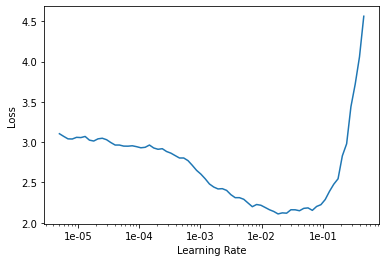

In [0]:
learn.lr_find(start_lr=1e-6,end_lr=1e1)
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(30,max_lr=slice(5e-04,3e-03))

epoch,train_loss,valid_loss,error_rate,time
0,1.602924,0.783687,0.277778,01:56
1,1.059899,0.526278,0.192063,01:31
2,0.827303,0.453357,0.150794,01:31
3,0.669510,0.391542,0.130159,01:31
4,0.585463,0.386113,0.114286,01:31
5,0.575829,0.412742,0.139683,01:31
6,0.531902,0.406789,0.111111,01:31
7,0.465179,0.411924,0.120635,01:31
8,0.424659,0.430701,0.107937,01:31
9,0.355016,0.624333,0.176190,01:31


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


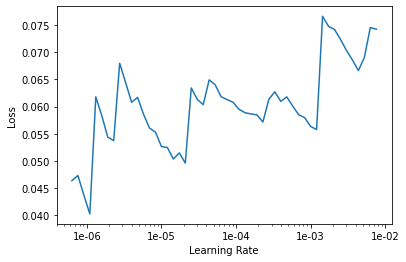

In [35]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save('96')

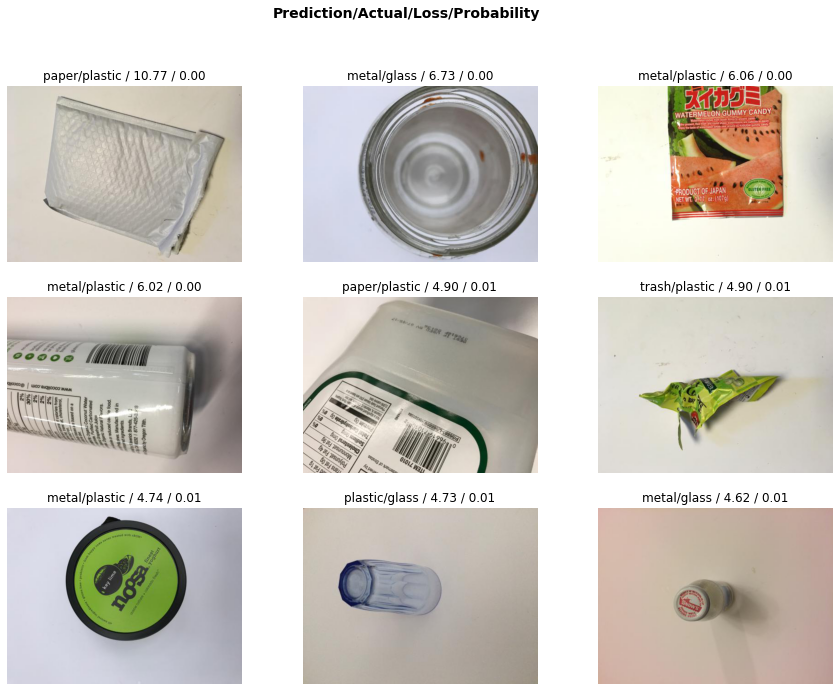

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
## delete everything when you're done to save space
#shutil.rmtree("data")
#shutil.rmtree('dataset-resized')

In [37]:
preds = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [0]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])

In [0]:
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)


In [41]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])


['glass', 'glass', 'glass', 'paper', 'plastic']
['glass', 'glass', 'glass', 'paper', 'plastic']


In [42]:
correct = 0
for i in range(len(y)):
    if y[i] == yhat[i]:
        correct += 1
print(correct/len(y))

0.9496062992125984


In [44]:
interp = ClassificationInterpretation.from_learner(learn)
print(interp.confusion_matrix())

[[100   0   0   1   0   0]
 [  0 119   2   0   4   0]
 [  0   1 101   0   0   0]
 [  1   0   0 146   1   0]
 [  0   0   3   1 111   5]
 [  1   1   0   2   1  29]]


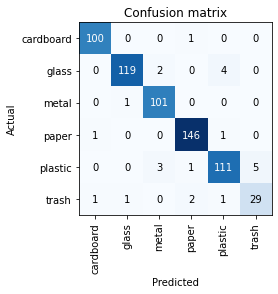

In [45]:
interp.plot_confusion_matrix()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


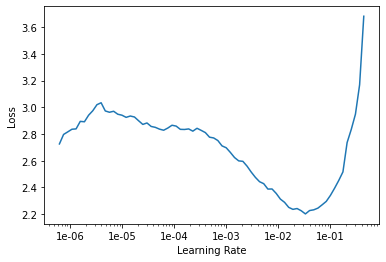

In [0]:
learn2 = cnn_learner(data,models.resnet18,metrics=error_rate).to_fp16()

learn2.lr_find()
learn2.recorder.plot()

In [0]:
learn2.fit_one_cycle(20, max_lr=2.5e-03)

epoch,train_loss,valid_loss,error_rate,time
0,2.014595,0.925528,0.366667,00:30
1,1.344285,0.599949,0.207937,00:30
2,0.943599,0.533051,0.174603,00:30
3,0.801036,0.487267,0.160317,00:30
4,0.674336,0.473357,0.153968,00:30
5,0.652147,0.554546,0.174603,00:30
6,0.606557,0.501730,0.179365,00:30
7,0.520118,0.411987,0.138095,00:30
8,0.512263,0.387670,0.125397,00:30
9,0.428089,0.294489,0.112698,00:30


In [0]:
learn2.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


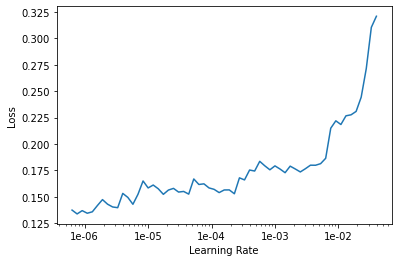

In [0]:
learn2.recorder.plot()

In [0]:
learn2.fit_one_cycle(4, max_lr=2e-05)

epoch,train_loss,valid_loss,error_rate,time
0,0.143200,0.202773,0.071429,00:31
1,0.165765,0.220010,0.079365,00:31
2,0.167074,0.215660,0.082540,00:31
3,0.168652,0.217219,0.082540,00:32


In [0]:
learn3 = cnn_learner(data,models.vgg11_bn,metrics=error_rate).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


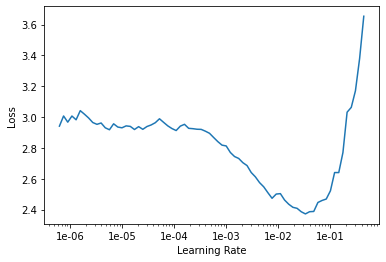

In [0]:
learn3.lr_find()
learn3.recorder.plot()

In [0]:
learn3.fit_one_cycle(20, max_lr=5e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.730029,0.766718,0.288889,00:35
1,1.185309,0.509559,0.176190,00:36
2,0.960787,0.458923,0.161905,00:35
3,0.875180,0.498936,0.163492,00:36
4,0.827826,0.426899,0.147619,00:35
5,0.827742,0.547098,0.165079,00:35
6,0.754478,0.432546,0.149206,00:36
7,0.719872,0.393226,0.141270,00:35
8,0.627492,0.625449,0.196825,00:35
9,0.608409,0.453155,0.147619,00:35


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


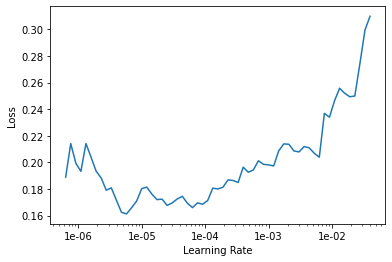

In [0]:
learn3.lr_find()
learn3.recorder.plot()

In [0]:
learn3.fit_one_cycle(10, max_lr=5e-03)

epoch,train_loss,valid_loss,error_rate,time
0,0.214029,0.173587,0.058730,00:37
1,0.276945,0.307194,0.096825,00:37
2,0.523408,0.422913,0.114286,00:36
3,0.569462,0.516889,0.168254,00:37
4,0.483512,0.246605,0.084127,00:36
5,0.379248,0.237752,0.074603,00:36
6,0.366771,0.209073,0.061905,00:36
7,0.313446,0.216211,0.073016,00:36
8,0.268445,0.190917,0.063492,00:36
9,0.232776,0.191999,0.066667,00:36


In [0]:
learn4 = cnn_learner(data,models.alexnet,metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


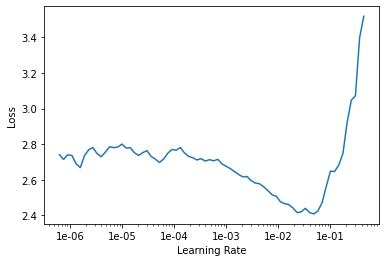

In [0]:
learn4.lr_find()
learn4.recorder.plot()

In [0]:
learn4.fit_one_cycle(20, max_lr=5e-03)

epoch,train_loss,valid_loss,error_rate,time
0,2.129935,1.107886,0.396825,00:29
1,1.531931,0.953382,0.349206,00:29
2,1.379858,0.829613,0.282540,00:29
3,1.227602,0.883067,0.312698,00:29
4,1.264668,0.971578,0.317460,00:29
5,1.231580,0.817289,0.271429,00:29
6,1.199643,0.931753,0.320635,00:29
7,1.083112,0.744047,0.268254,00:29
8,1.061916,0.862569,0.322222,00:30
9,1.018087,0.901460,0.317460,00:29
